# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
## Capítulo 5: Janelamento e Localização

In [1]:
import math as m
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

### Seção 5.1 - Visão geral: Não-localidade da DFT

#### Exemplo 5.1

Considere dois sinais $f(t)$ e $g(t)$ definidos em $0\le t\le 1$ como
$$f(t) = \frac{1}{2}\sin(2\pi(96)t)+\frac{1}{2}\sin(2\pi(235)t)$$
e
$$g(t) = \left\{\begin{array}{ll}
\sin(2\pi(96)t),&0\le t<\frac{1}{2}\\
\sin(2\pi(235)t),&\frac{1}{2}\le t\le 1.
\end{array}\right.$$
Esses sinais são amostrados com taxa $R=1000$ Hz e suas DFTs são apresentadas a seguir.

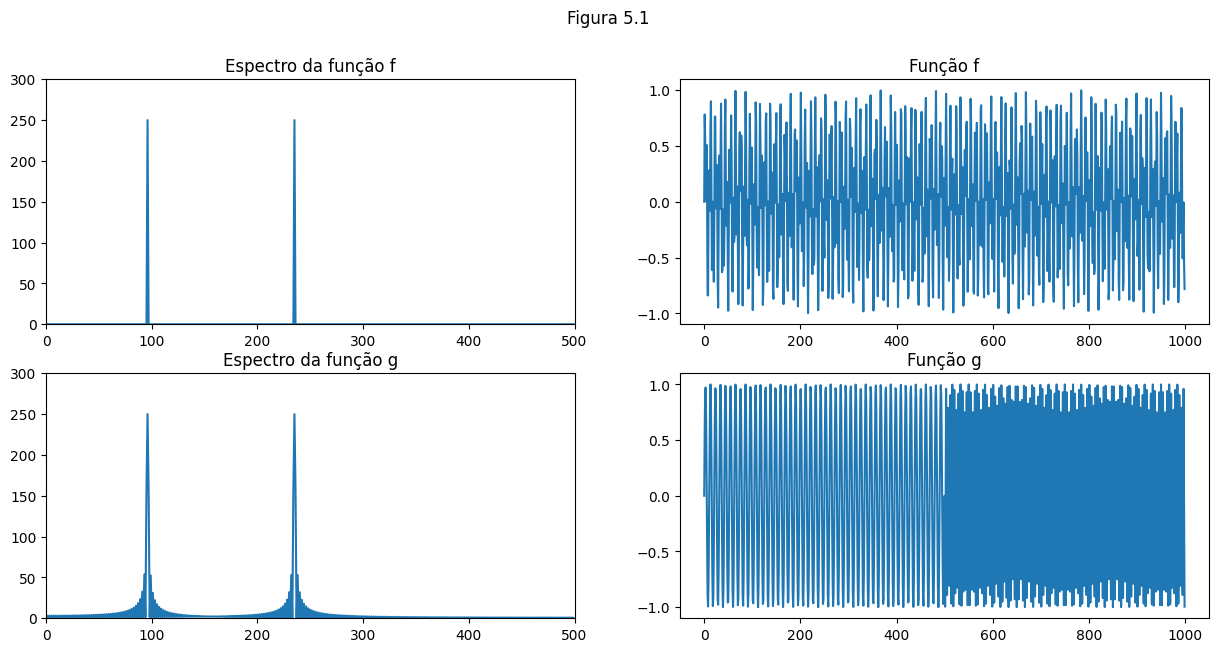

In [2]:
N = 1000;
# t = np.linspace(0, 1-1/N, N);
t = np.linspace(0, 1, N, endpoint=False) # melhor assim

f = 0.5*np.sin(2*m.pi*96*t)+0.5*np.sin(2*m.pi*235*t)

g = np.concatenate( (np.sin(2*m.pi*96*t[0:N//2]), np.sin(2*m.pi*235*t[N//2:N])) , axis=0) 

fig, axes = plt.subplots(2,2, figsize=(15,7));
fig.suptitle("Figura 5.1")

axes[0,0].set_title('Espectro da função f');
axes[0,0].plot( range(N//2) , abs(np.fft.fft(f)[0:N//2]) )
axes[0,0].axis([0, 500, 0, 300]);

axes[0,1].set_title('Função f');
axes[0,1].plot(f)

axes[1,0].set_title('Espectro da função g');
axes[1,0].plot( range(N//2) , abs(np.fft.fft(g)[0:N//2]) )
axes[1,0].axis([0, 500, 0, 300]);

axes[1,1].set_title('Função g');
axes[1,1].plot(g);
plt.show()


#### Exemplo 

Considere dois sinais $f(t)$ e $g(t)$ definidos em $0\le t\le 1$ como
$$f(t) = \frac{1}{2}\sin(2\pi(9)t)+\frac{1}{2}\sin(2\pi(23)t)$$
e
$$g(t) = \left\{\begin{array}{ll}
\sin(2\pi(9)t),&0\le t<\frac{1}{2}\\
\sin(2\pi(23)t),&\frac{1}{2}\le t\le 1.
\end{array}\right.$$
Esses sinais são amostrados com taxa $R=100$ Hz e suas DFTs são apresentadas a seguir.

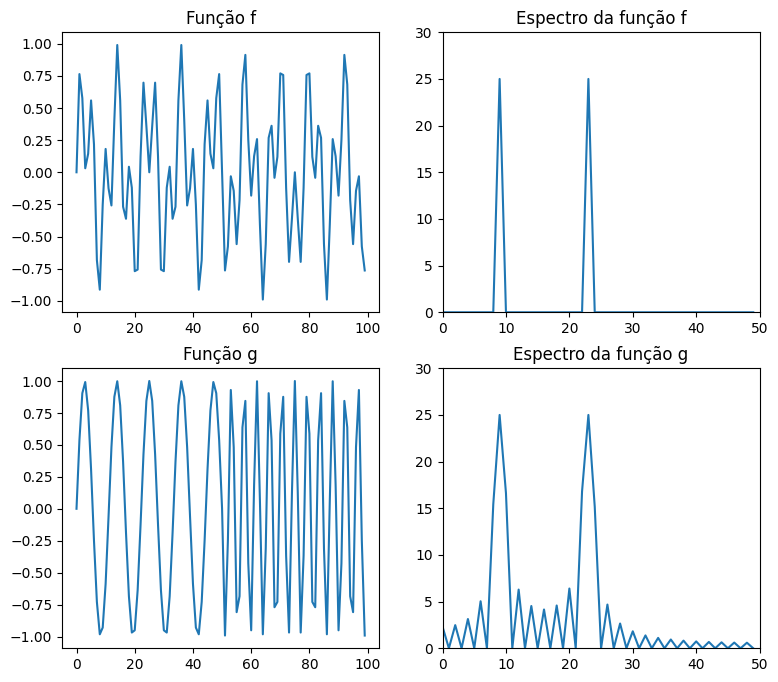

In [8]:
N = 100;
# t = np.linspace(0, 1-1/N, N);
t = np.linspace(0, 1, N, endpoint=False) # melhor assim

f = 0.5*np.sin(2*m.pi*9*t)+0.5*np.sin(2*m.pi*23*t)

g = np.concatenate( (np.sin(2*m.pi*9*t[0:N//2]), np.sin(2*m.pi*23*t[N//2:N])) , axis=0) 

fig, axes = plt.subplots(2,2, figsize=(9,8));

axes[0,1].set_title('Espectro da função f');
axes[0,1].plot( range(N//2) , abs(np.fft.fft(f)[0:N//2]) )
axes[0,1].axis([0, 50, 0, 30]);

axes[0,0].set_title('Função f');
axes[0,0].plot(f)

axes[1,1].set_title('Espectro da função g');
axes[1,1].plot( range(N//2) , abs(np.fft.fft(g)[0:N//2]) )
axes[1,1].axis([0, 50, 0, 30]);

axes[1,0].set_title('Função g');
axes[1,0].plot(g);
plt.show()

Esse exemplo ilustra a característica de *não-localidade* da DFT: os espectros mostram as componentes senoidais presentes no sinal, mas não permitem distinguir *em que segmentos temporais* do sinal essas componentes estão ativas.

Isso fica claro ao considerarmos que a DFT expressa um sinal $x$ através da equação de síntese
$$x = \frac{1}{N}\sum_{k=0}^{N-1}X_kE_k,$$
onde $E_k$ são formas de onda básicas cujo comportamento oscilatório é invariante ao longo de todo o sinal.

Em outras palavras, na equação de síntese *todas as componentes estão presentes o tempo todo e com intensidade constante* ($|X_k|$), já que cada sinal $X_kE_k$ tem a forma

$$\begin{array}{ll}
X_kE_k &= \big(X_k(E_k)_0,X_k(E_k)_1,\ldots,X_k(E_k)_{N-1}\big) \\
&= \big(X_ke^{i2\pi k(0)/N},X_ke^{i2\pi k(1)/N},\ldots,X_ke^{i2\pi k(N-1)/N}\big),\end{array}$$

sendo que o mesmo coeficiente $X_k$ está presente durante toda a duração dessa componente de frequência fixa $k$ (ciclos por $N$ amostras).

Nesse exemplo em particular é possível investigar como o sinal $g(t)$ que *alterna* as duas senoides de frequências $96$ Hz e $235$ Hz pode ser representado pela DFT que considera apenas componentes sem variação de frequência: podemos considerar $g(t)=g^{(1)}(t)+g^{(2)}(t)$ onde
$$\begin{array}{ll}
g^{(1)}(t) = \sin(2\pi(96)t),&0\le t<\frac{1}{2},\\
g^{(1)}(t)=0,&\frac{1}{2}\le t\le 1,\\
g^{(2)}(t) = \sin(2\pi(235)t),&\frac{1}{2}\le t\le 1,\\
g^{(2)}(t)=0,&0\le t<\frac{1}{2},
\end{array}$$
sendo que $g^{(1)}$ e $g^{(2)}$ podem ser vistos como *recortes* do sinal por *janelas* de tamanho $\frac{N}{2}$. Pela linearidade da DFT, sabemos que $G_k = G^{(1)}_k+G^{(2)}_k,\ \forall k$. O gráfico a seguir mostra como a DFT de $g$ se decompõe exatamente nas DFTs de $g^{(1)}$ e $g^{(2)}$.

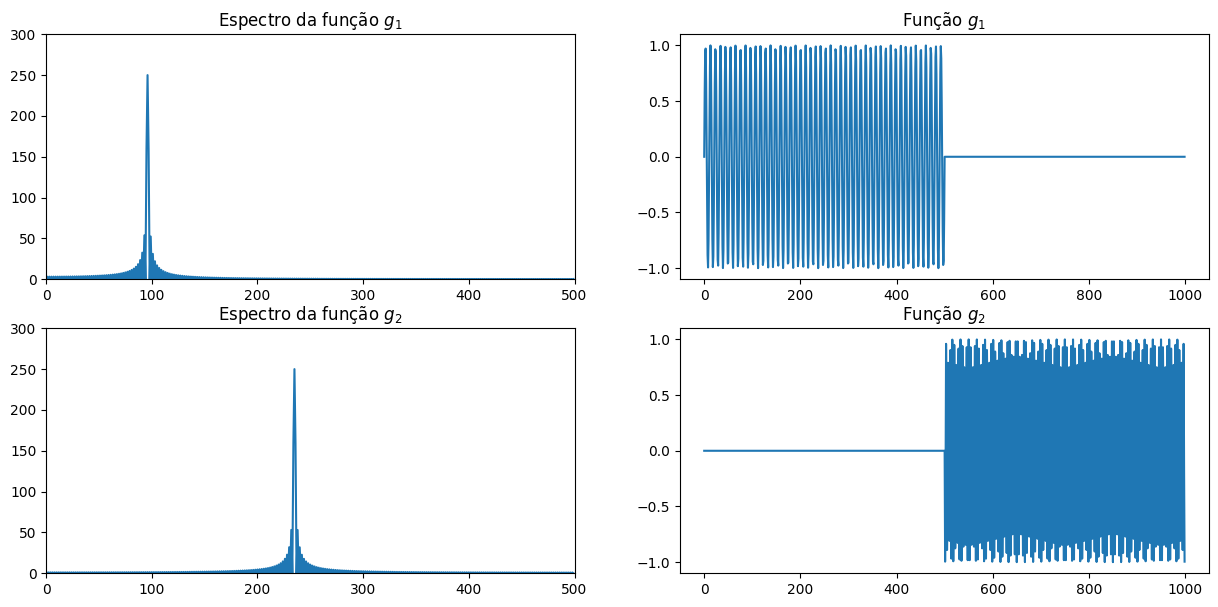

In [3]:
g1 = g*(t<0.5) # mantem primeira metade do sinal, anula segunda metade
g2 = g*(t>=0.5) # mantem segunda metade do sinal, anula primeira metade

fig, axes = plt.subplots(2,2, figsize=(15,7))
axes[0,0].set_title('Espectro da função $g_1$')
axes[0,0].plot( range(N//2) , abs(np.fft.fft(g1)[0:N//2]) )
axes[0,0].axis([0, 500, 0, 300]);

axes[0,1].set_title('Função $g_1$');
axes[0,1].plot(g1)

axes[1,0].set_title('Espectro da função $g_2$')
axes[1,0].plot( range(N//2) , abs(np.fft.fft(g2)[0:N//2]) )
axes[1,0].axis([0, 500, 0, 300]);
axes[1,1].set_title('Função $g_2$');
axes[1,1].plot(g2)

plt.show()

### Seção 5.2 - Localização por janelamento

Vamos considerar uma generalização do processo de segmentação do sinal visto no exemplo anterior, a partir do produto de $x\in\mathbb{C}^N$ por uma **janela**, representada por um sinal $w\in\mathbb{C}^N$, que seleciona $M>0$ amostras a partir de uma amostra inicial $m\ge 0$, sendo definida como
$$w_n=\left\{\begin{array}{ll}
1,&m\le n<m+M\\
0,&\mbox{caso contrário.}
\end{array}\right.$$

Essa janela permite a construção de um sinal $y=w.\!x$ onde '$.$' denota o produto de Hadamard, ou seja,
$$y_n = w_nx_n,\ n=0,1,\ldots,N-1.$$
O termo *janela* tem relação com a restrição de visualização: no sinal $y$ só conseguimos observar o conteúdo do sinal $x$ entre as amostras $m$ e $m+M-1$. A forma de pulso retangular do sinal $w$ explica a denominação **janela retangular**.

### Exemplo 5.2

Considere outra vez o sinal $f\in\mathbb{C}^{1000}$ do exemplo anterior, amostrado a partir de $$f(t) = \frac{1}{2}\sin(2\pi(96)t)+\frac{1}{2}\sin(2\pi(235)t)$$
com taxa $R=1000$ Hz em $0\le t\le 1$. Queremos visualizar o conteúdo desse sinal no intervalo $[m,m+M)$ onde $m=100$ e $M=50$. 

Construiremos duas versões do sinal:

- uma versão *janelada* $g=w.\!f\in\mathbb{C}^{1000}$, obtida pelo produto com a janela retangular $w\in\mathbb{C}^{1000}$, definida como $w_n=1,\ m\le n<m+M$ e $w_n=0$ caso contrário;

- uma versão *recortada* $\tilde{f}\in\mathbb{C}^{50}$ definida como $\tilde{f}_n = f_{m+n},\ n=0,1,\ldots,M-1$;

- o restante dessa seção será dedicado a esclarecer a relação entre as DFTs de $g$ e de $\tilde{f}$ ilustradas a seguir.

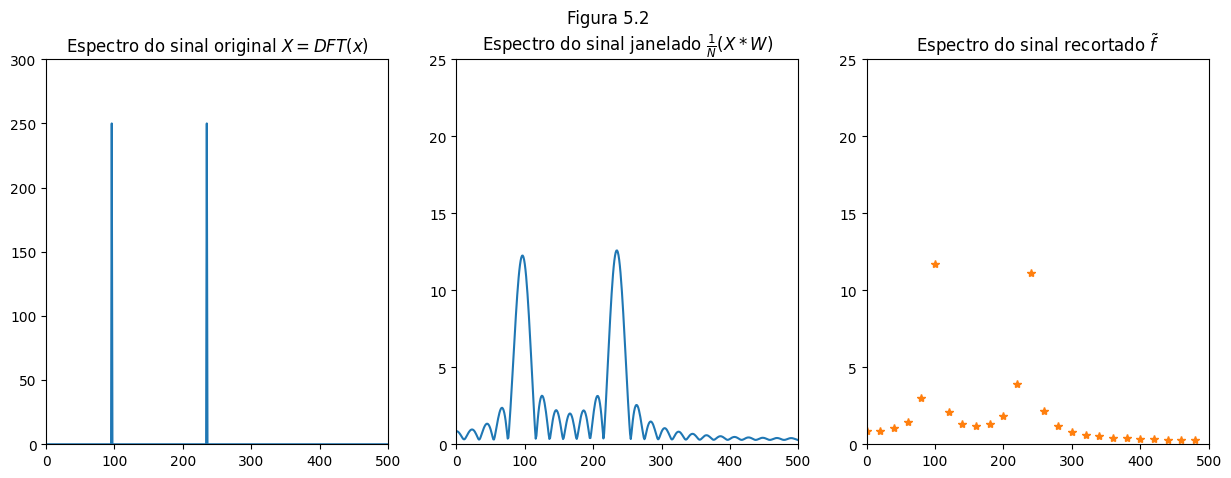

In [9]:
w = np.zeros(N);
w[99:149] = np.ones(50);
ftil = w * f
fig, axes = plt.subplots(1, 3, figsize=(15,5));
fig.suptitle("Figura 5.2")


axes[0].plot( range(N//2), abs(np.fft.fft(f)[0:N//2]) )
axes[0].axis([0, 500, 0, 300]);
axes[0].set_title(r"Espectro do sinal original $X=DFT(x)$")


axes[1].plot( range(N//2), abs(np.fft.fft(ftil)[0:N//2]) )
axes[1].axis([0, 500, 0, 25]);
axes[1].set_title(r"Espectro do sinal janelado $\frac{1}{N}(X*W)$")

axes[2].plot( range(0,500,20), abs(np.fft.fft(ftil[99:149])[0:25]),"*C1")
axes[2].axis([0, 500, 0, 25]);
axes[2].set_title(r"Espectro do sinal recortado $\tilde{f}$");

## Notas
Entendi que a ideia aqui é de comparar duas alternativas de trazer a localização.
1. O janelamento do sinal, que mantém a resolução espectral.
2. O recorte do sinal, que reduz a resolução espectral.

Esse tradeof da resolução aparece mais na frente, na hora especificar os parâmetros do espectograma.
Mas me parece que ele esquece o recorte e utiliza apenas o janelamento daqui para frente.

### Seção 5.2.2: Análise do janelamento
Considere a situação ilustrada no último exemplo:
- $x\in\mathbb{C}^{N}$ é um sinal arbitrário;

- $w\in\mathbb{C}^{N}$ é uma *janela* definida entre $m$ e $m+M-1$, ou seja, $w_n\in\mathbb{C},\ m\le n<m+M$ e $w_n=0$ caso contrário. A janela retangular $w_n=1,\ m\le n<m+M$ é um exemplo de janela desse tipo, mas não o único que consideraremos;

- $y=w.x\in\mathbb{C}^{N}$ é o sinal $x$ *janelado*

- $\tilde{x}\in\mathbb{C}^{M}$ é o sinal *recortado* $\tilde{x}=(x_m,\ldots,x_{m+M-1})$.

Para simplificar, considere que $M$ divide $N$ ($N=qM$ para $q$ inteiro). Vamos investigar a relação entre as DFTs de $y$ e $\tilde{x}$ em 3 passos.

### Passo 1: Relação entre $X$ e $Y$

A relação entre as DFTs do sinal original e do sinal janelado é estabelecida a seguir:

#### Proposição 5.2.1

Sejam $x,w\in\mathbb{C}^N$ com DFTs $X$ e $W$, e considere $y=w.\!x$ com DFT $Y$. Então
$$Y = \frac{1}{N}X*W$$
onde '$*$' representa a convolução circular em $\mathbb{C}^N$.

Essa proposição é uma espécie de forma inversa do teorema da convolução: aquele dizia que

> "a convolução no domínio do tempo equivale ao produto de Hadamard no domínio da frequência,"

ao passo que a proposição 5.2.1 diz que

> "o produto de Hadamard no domínio do tempo equivale à convolução no domínio da frequência, a menos de uma constante $\frac{1}{N}$.

A demonstração desse resultado é muito parecida com a do teorema da convolução original (exercício 5.3).

In [10]:
from scipy.fft import fft, ifft
def conv_circular(x,h):
    X = fft(x)
    H = fft(h)
    W = X * H
    w = ifft(W)
    return w

def test_conv_circular(dut, N):
    x = np.random.rand(N)
    h = np.random.rand(N)
    
    # vou testar aproveitando a relação entre convolução circular e linear
    conv_linear_golden = np.convolve(x,h)
    
    conv_linear_size = len(x)+len(h)-1 # 2*N-1
    x_pad = np.concatenate([x, np.zeros(N-1)])
    h_pad = np.concatenate([h, np.zeros(N-1)])
    conv_circular_result = dut(x_pad, h_pad)
    
    assert np.allclose(conv_linear_golden, conv_circular_result), 'Teste falhou.'
    print('Teste passou')

    
test_conv_circular(conv_circular, 10000)

Teste passou


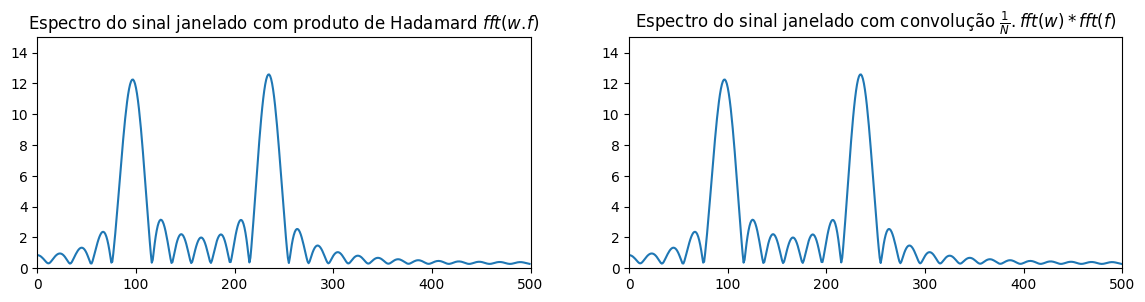

In [11]:
def test_hadarmd_convolucao(x,w):
    N = len(x)
    X = fft(x)
    W = fft(w)
    Y = 1/N * conv_circular(X,W)
    
    fig, axes = plt.subplots(1, 2, figsize=(14,3));
    
    axes[0].plot( range(N//2), abs(np.fft.fft(ftil)[0:N//2]) )
    axes[0].axis([0, 500, 0, 15]);
    axes[0].set_title(r"Espectro do sinal janelado com produto de Hadamard $fft(w.\!f)$")
    
    axes[1].plot( range(N//2), abs(Y)[0:N//2]) 
    axes[1].axis([0, 500, 0, 15]);
    axes[1].set_title(r"Espectro do sinal janelado com convolução $\frac{1}{N}.fft(w)*fft(f)$")

    

test_hadarmd_convolucao(f,w)

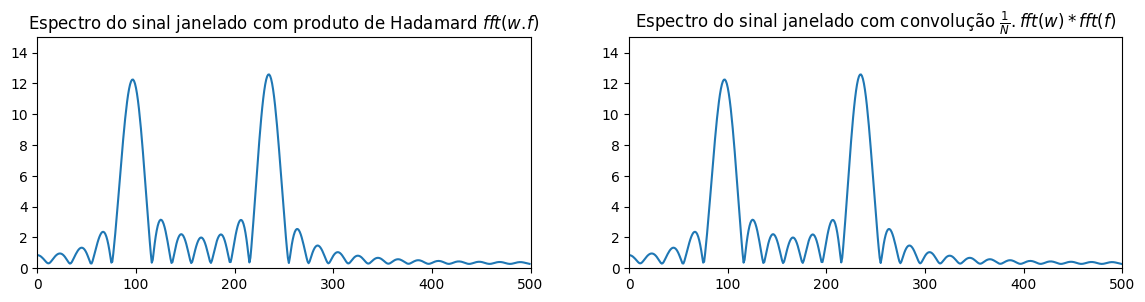

In [12]:
def test_hadarmd_convolucao(x,w):
    N = len(x)
    X = fft(x)
    W = fft(w)
    Y = 1/N * conv_circular(X,W)
    Y = 1/N * conv_circular(X,W)
    
    fig, axes = plt.subplots(1, 2, figsize=(14,3));
    
    axes[0].plot( range(N//2), abs(np.fft.fft(ftil)[0:N//2]) )
    axes[0].axis([0, 500, 0, 15]);
    axes[0].set_title(r"Espectro do sinal janelado com produto de Hadamard $fft(w.\!f)$")
    
    axes[1].plot( range(N//2), abs(Y)[0:N//2]) 
    axes[1].axis([0, 500, 0, 15]);
    axes[1].set_title(r"Espectro do sinal janelado com convolução $\frac{1}{N}.fft(w)*fft(f)$")

    

test_hadarmd_convolucao(f,w)

## Notas

O espectro do sinal janelado não é igual ao espectro do sinal original. Apesar das componentes de frequência aparecerem com pico, da para perceber que a magnitude é diferente. Além de passar pela convolução com W. A equação 5.6 diz que $Y_{janelado}=\frac{1}{N}X*W$. Em outras palavras a magniture está sendo dividia por N.

$$DFT(\tilde{f}=x.w)=\frac{1}{N} . X * W$$

Essa convolução $X*W$ é o que diz que os picos de frequências vão ser carimbados com $W$.

In [13]:
pico1 = abs(np.fft.fft(f))[96]
pico1_janelado = abs(np.fft.fft(ftil))[96]
print(f'X[96]={pico1}')
print(r'X_{janelado}[96]', {pico1_janelado})
print(f'razão={pico1/pico1_janelado}')
print(f'razão={pico1_janelado/pico1}')
49/1000

X[96]=250.00000000000003
X_{janelado}[96] {12.243734724729388}
razão=20.418606382826997
razão=0.04897493889891755


0.049

#### Exemplo 5.3

Considere a janela retangular $w\in\mathbb{C}^N$. Podemos calcular sua DFT diretamente pela definição:

$$\begin{array}{ll}
W_k&=\displaystyle\sum_{n=m}^{m+M-1}e^{-i2\pi kn/N}\\
&=e^{-i2\pi km/N}\displaystyle\sum_{n=0}^{M-1}e^{-i2\pi kn/N}\\
&=e^{-i2\pi km/N}\frac{1-e^{-i2\pi kM/N}}{1-e^{-i2\pi k/N}}\\
\end{array}$$
de onde (veja o exemplo idêntico na seção 2.4)
$$|W_k| = \sqrt{\frac{1-\cos(2\pi kM/N)}{1-\cos(2\pi k/N)}}.$$

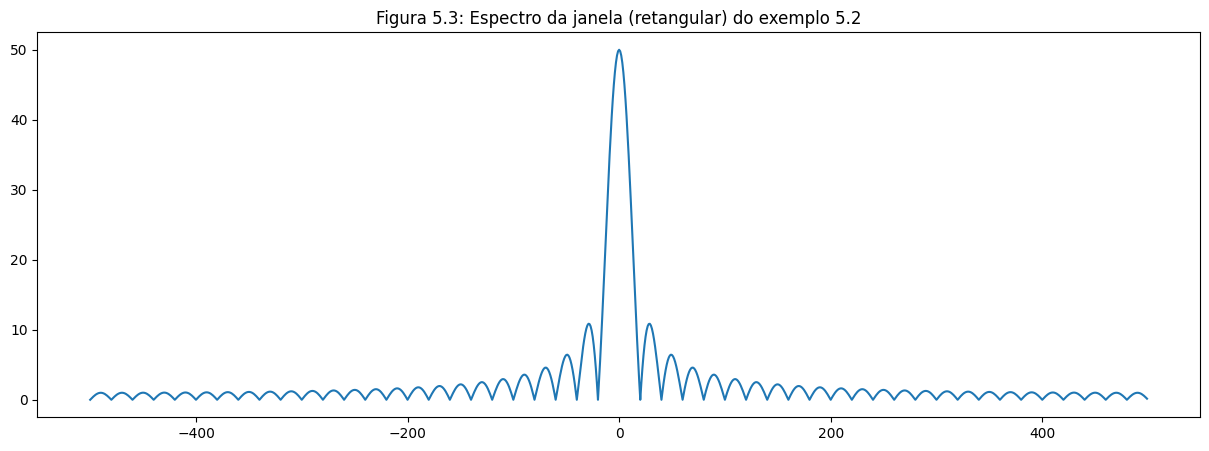

In [14]:
fig, axes = plt.subplots(figsize=(15,5))
axes.plot( range(-N//2, N//2), np.roll(abs(np.fft.fft(w)), N//2 ))
axes.set_title("Figura 5.3: Espectro da janela (retangular) do exemplo 5.2");

A imagem anterior, que é o espectro da janela, explica o exemplo visto anteriormente: cada componente espectral isolada ("pico") no espectro de $f$, que correspondem às frequências de $96$ Hz e $235$ Hz, dá origem (através da convolução $Y=\frac{1}{N}X*W$) a uma cópia do padrão acima. Em outras palavras, cada componente senoidal produz uma série de outras componentes secundárias *por causa* do janelamento, um fenômeno denominado **vazamento espectral**.

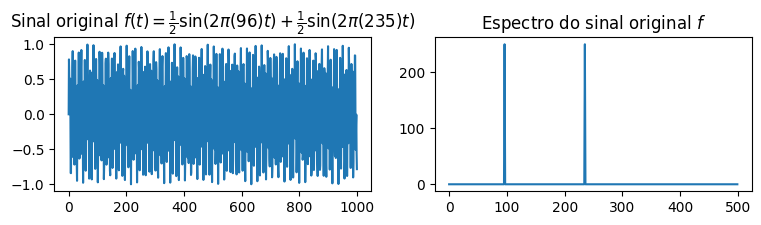

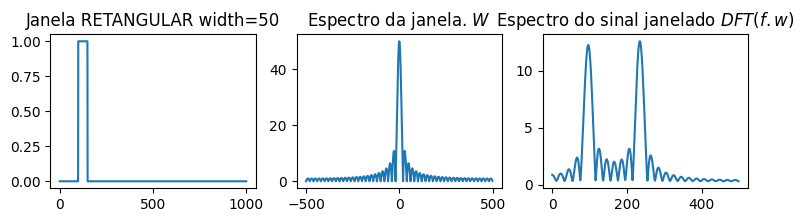

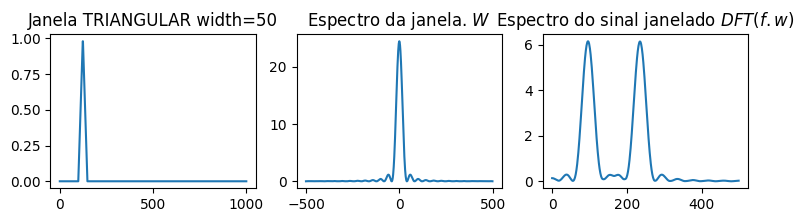

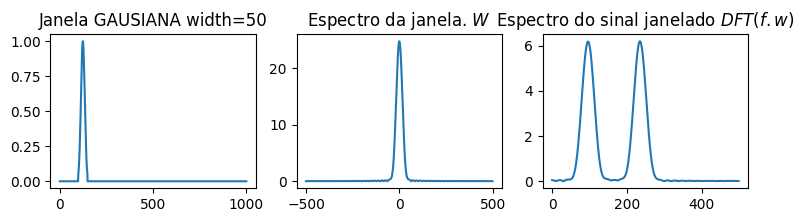

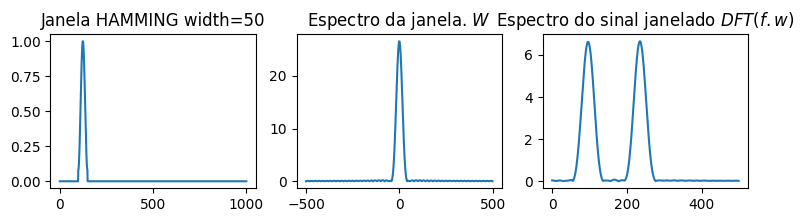

In [15]:
def build_window(N, start, width, type='retangular'):
    w = np.zeros(N);
    if type == 'retangular':
        w[start:start+width] = 1
        
    if type == 'triangular':
        w[start:start+width] = np.bartlett(width)
    
    if type == 'gausiana':
        sigma = 10
        w[start:start+width] = signal.gaussian(width, sigma)
        
    if type == 'hamming':
        w[start:start+width] = np.hamming(width)
        
    return w


window_start = 99
window_width = 50

fig, axes = plt.subplots(1, 2, figsize=(9,2));
axes[0].plot(f)
axes[0].set_title(r"Sinal original $f(t) = \frac{1}{2}\sin(2\pi(96)t)+\frac{1}{2}\sin(2\pi(235)t)$")
axes[1].plot( range(N//2), abs(np.fft.fft(f)[0:N//2]) )
axes[1].set_title(r"Espectro do sinal original $f$")




janelas = ['retangular', 'triangular', 'gausiana', 'hamming']
for janela in janelas:
    w = build_window(N, window_start, window_width, type=janela)
    ftil = w * f
    
    fig, axes = plt.subplots(1, 3, figsize=(9,2));

    axes[0].plot(w)
    axes[0].set_title(f"Janela {janela.upper()} width={window_width}")

    axes[1].plot( range(-N//2, N//2), np.roll(abs(np.fft.fft(w)), N//2 ))
    axes[1].set_title(r"Espectro da janela. $W$")

    axes[2].plot( range(N//2), abs(np.fft.fft(ftil)[0:N//2]) )
    axes[2].set_title(r"Espectro do sinal janelado $DFT(f.w)$")





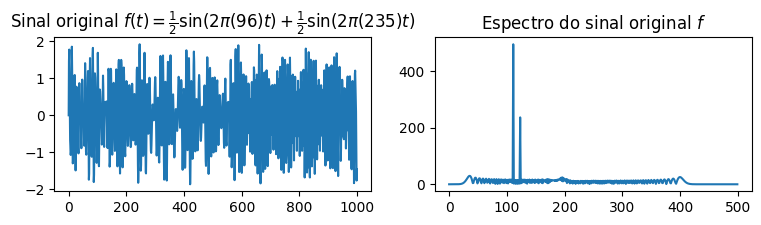

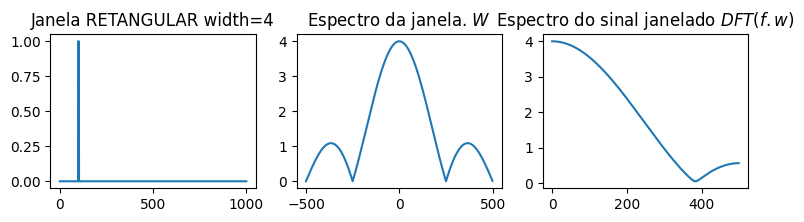

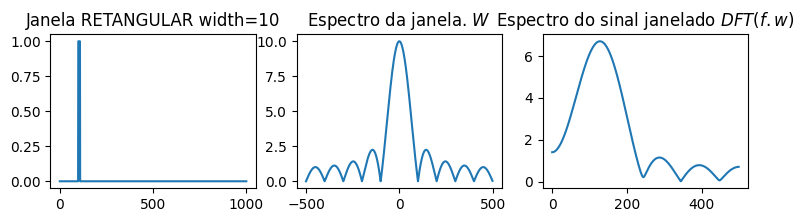

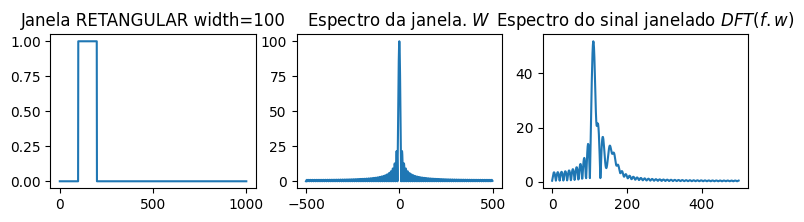

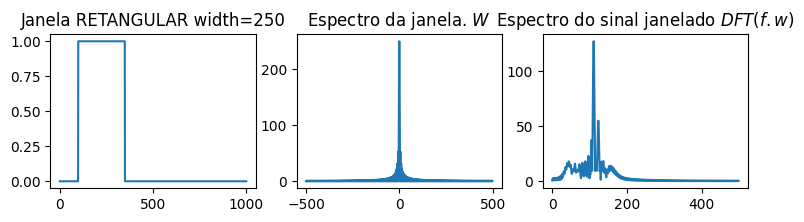

In [150]:
def build_window(N, start, width, type='retangular'):
    w = np.zeros(N);
    if type == 'retangular':
        w[start:start+width] = 1
        
    if type == 'triangular':
        w[start:start+width] = np.bartlett(width)
    
    if type == 'gausiana':
        sigma = 10
        w[start:start+width] = signal.gaussian(width, sigma)
        
    if type == 'hamming':
        w[start:start+width] = np.hamming(width)
        
    return w


window_start = 99
window_width = 50

fig, axes = plt.subplots(1, 2, figsize=(9,2));
axes[0].plot(f)
axes[0].set_title(r"Sinal original $f(t) = \frac{1}{2}\sin(2\pi(96)t)+\frac{1}{2}\sin(2\pi(235)t)$")
axes[1].plot( range(N//2), abs(np.fft.fft(f)[0:N//2]) )
axes[1].set_title(r"Espectro do sinal original $f$")




larguras = [4, 10, 100, 250]
for window_width in larguras:
    janela = 'retangular'
    w = build_window(N, window_start, window_width, type=janela)
    ftil = w * f
    
    fig, axes = plt.subplots(1, 3, figsize=(9,2));

    axes[0].plot(w)
    axes[0].set_title(f"Janela {janela.upper()} width={window_width}")

    axes[1].plot( range(-N//2, N//2), np.roll(abs(np.fft.fft(w)), N//2 ))
    axes[1].set_title(r"Espectro da janela. $W$")

    axes[2].plot( range(N//2), abs(np.fft.fft(ftil)[0:N//2]) )
    axes[2].set_title(r"Espectro do sinal janelado $DFT(f.w)$")





### Passo 2: "rebobinando" o sinal janelado

Para facilitar a comparação entre o espectro de $y=w.\!x=(0,\ldots,0,x_m,\ldots,x_{m+M-1},0,\ldots,0)\in\mathbb{C}^N$ e $\tilde{x}=(x_m,\ldots,x_{m+M-1})\in\mathbb{C}^M$ consideraremos um passo intermediário, correspondente a transportar a porção janelada do sinal $y$ para o início do vetor, através do vetor
$$\tilde{y}=(x_m,\ldots,x_{m+M-1},0,\ldots,0)\in\mathbb{C}^N.$$
A única diferença entre $y$ e $\tilde{y}$ é um deslocamento para a esquerda (um "avanço" temporal) de $m$ amostras, que afeta de forma idêntica todas as componentes do sinal, ou seja, cada componente $Y_kE_k$ terá sua fase inicial "avançada" em $m$ amostras, conforme estabelece a proposição a seguir.

#### Proposição 5.2.2

Seja $y\in\mathbb{C}^N$ com DFT $Y$. Seja $\tilde{y}\in\mathbb{C}^N$ o sinal obtido de $y$ por um shift circular de $m$ amostras:
$$\tilde{y}_n = y_{n+m\% N}.$$

Então a DFT de $\tilde{y}$ tem componentes $\tilde{Y}_k = e^{i2\pi km/N}Y_k$.

A demonstração dessa proposição corresponde ao exercício 2.19 (feito na lista 3).

Lembrando que no passo 1 estabelecemos que 
$$Y = \frac{1}{N}X*W,$$
no final do passo 2 teremos
$$\tilde{Y}_k = e^{i2\pi km/N}\frac{1}{N}(X*W)_k.$$

Text(0.5, 1.0, 'Espectro do sinal janelado $\\frac{1}{N}(X*W)$')

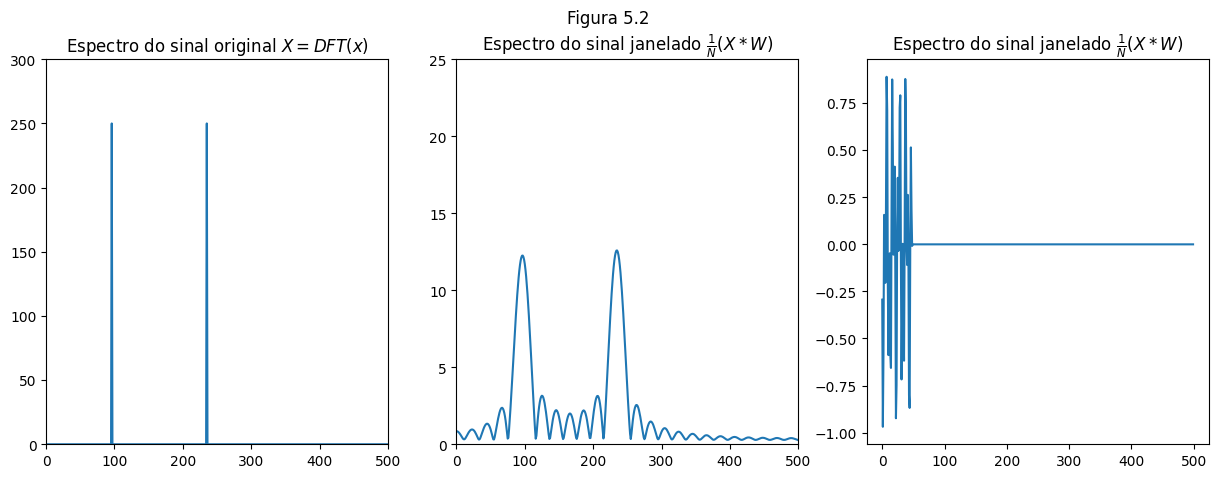

In [16]:


w = np.zeros(N);
w[99:149] = np.ones(50);
ftil = w * f
ftil_deslocado = np.roll(ftil,-100)
fig, axes = plt.subplots(1, 3, figsize=(15,5));
fig.suptitle("Figura 5.2")


axes[0].plot( range(N//2), abs(np.fft.fft(f)[0:N//2]) )
axes[0].axis([0, 500, 0, 300]);
axes[0].set_title(r"Espectro do sinal original $X=DFT(x)$")


axes[1].plot( range(N//2), abs(np.fft.fft(ftil)[0:N//2]) )
axes[1].axis([0, 500, 0, 25]);
axes[1].set_title(r"Espectro do sinal janelado $\frac{1}{N}(X*W)$")

axes[2].plot( range(N//2), ftil_deslocado[0:N//2] )
# axes[2].axis([0, 500, 0, 25]);
axes[2].set_title(r"Espectro do sinal janelado $\frac{1}{N}(X*W)$")


# axes[2].plot( range(0,500,20), abs(np.fft.fft(ftil[99:149])[0:25]),"*C1")
# axes[2].axis([0, 500, 0, 25]);
# axes[2].set_title(r"Espectro do sinal recortado $\tilde{f}$");

## ??


### Passo 3: DFT de $N$ pontos versus DFT de $M$ pontos

Considere novamente
$$\begin{array}{ll}
\tilde{y}=(x_m,\ldots,x_{m+M-1},0,\ldots,0)\in\mathbb{C}^N\quad
\mbox{e}\\
\tilde{x}=(x_m,\ldots,x_{m+M-1})\in\mathbb{C}^M.\end{array}$$

Suas DFTs serão
$$\tilde{Y}_k = \sum_{n=0}^{{\color{red}N}-1}\tilde{y}_ne^{-i2\pi kn/N} = \sum_{n=0}^{{\color{blue}M}-1}\tilde{y}_ne^{-i2\pi kn/{\color{green}N}}$$
$$\tilde{X}_k = \sum_{n=0}^{M-1}\tilde{{\color{red}x}}_ne^{-i2\pi kn/M} = \sum_{n=0}^{M-1}\tilde{{\color{blue}y}}_ne^{-i2\pi kn/{\color{green}M}}.$$
Note que as diferenças entre as expressões originais da DFTs e suas reformulações foram destacadas em vermelho e azul, e que as expressões finais diferem apenas nos termos em verde.

Lembrando agora que $N = qM$ para algum $q$ inteiro, teremos $M = N/q$, ou seja
$$\tilde{X}_k = \sum_{n=0}^{M-1}\tilde{y}_ne^{-i2\pi kn/M} = \sum_{n=0}^{M-1}\tilde{y}_ne^{-i2\pi qkn/N}.$$
Mas $\tilde{Y}_k = \displaystyle\sum_{n=0}^{M-1}\tilde{y}_ne^{-i2\pi kn/N}$, de onde concluímos que
$$\tilde{X}_k = \tilde{Y}_{qk},\ \forall k.$$

Note que isso representa um processo de *sub-amostragem* com fator de $q=N/M$, e mostra que as imagens da esquerda e da direita na figura 5.2, repetidas abaixo, correspondem de fato ao espectro de magnitude $|\tilde{Y}|=|Y|\in\mathbb{C}^{1000}$ e sua versão sub-amostrada $q=20$ vezes $|\tilde{X}|\in\mathbb{C}^{50}$.

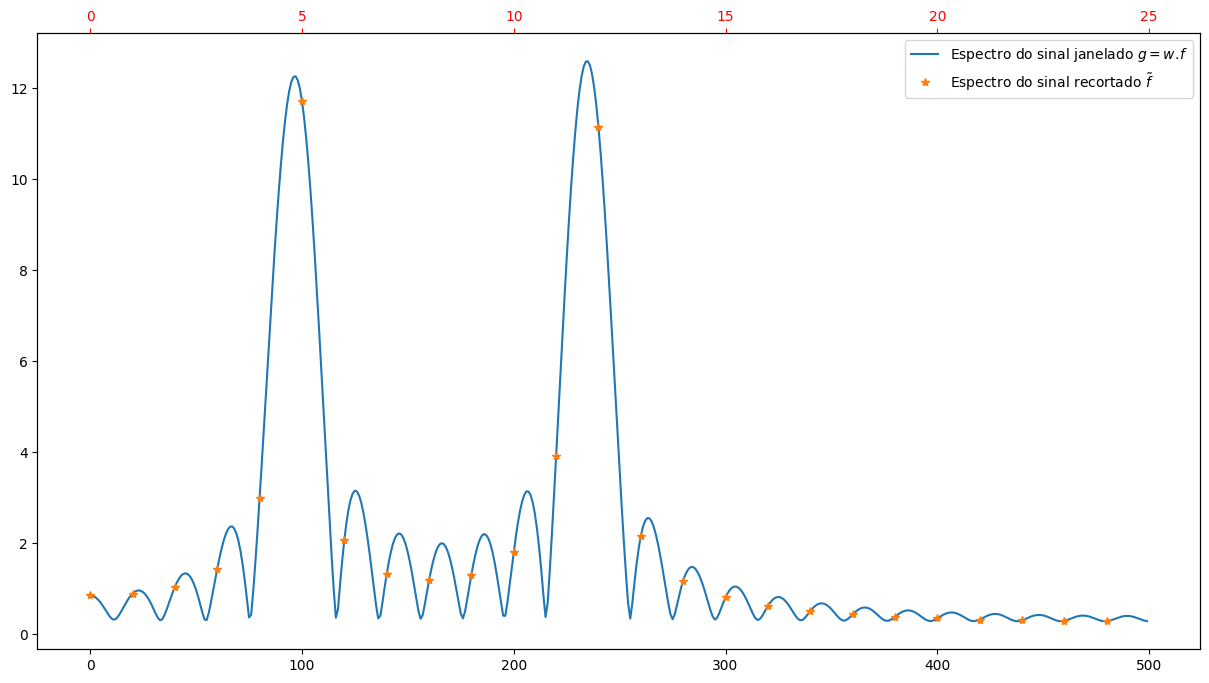

In [17]:
window_width=50
w = np.zeros(N);
w[99:99+window_width] = np.ones(window_width);
ftil = w * f
fig = plt.figure(figsize=(15,8)); 


ax1 = fig.add_subplot(111); 
ax2 = ax1.twiny()

pl1 = ax1.plot(np.arange(N//2), abs(np.fft.fft(ftil)[0:N//2]),label=r"Espectro do sinal janelado $g=w.\!f$")

pl2 = ax2.plot(np.arange(window_width//2)*(N//2)/(window_width//2), abs(np.fft.fft(ftil[99:99+window_width])[0:window_width//2]),"*C1",label=r"Espectro do sinal recortado $\tilde{f}$")

new_tick_locations = np.arange(0,501,100);

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations);
ax2.set_xticklabels((new_tick_locations*(window_width//2)/500).astype(int));
ax2.xaxis.label.set_color('C1');
ax2.tick_params(axis='x', colors='red')
pls = pl1+pl2;
labels = [p.get_label() for p in pls];
ax1.legend(pls, labels, loc=0);
plt.show()

Combinando os resultados dos 3 passos, chegamos ao seguinte teorema

#### Teorema 5.2.1

Seja $x\in\mathbb{C}^N$ janelado por um sinal $w\in\mathbb{C}^N$ onde $w_n\neq 0 \iff m\le n<m+M$, e suponha que $N=qM$. Então a relação entre a DFT $N$-dimensional $X$ de $x$ e a DFT $M$-dimensional $\tilde{X}$ de $\tilde{x}=(w_mx_m,\ldots,w_{m+M-1}x_{m+M-1})\in\mathbb{C}^M$ é dada por
$$\tilde{X}_k = \frac{e^{i2\pi mqk/N}}{N}(X*W)_{qk} = \frac{e^{i2\pi mk/M}}{N}(X*W)_{qk},$$

onde a última igualdade segue de $q/N=1/M$.

### Exemplo 5.4

O teorema 5.2.1 mostra que o janelamento e subsequente recorte promove alterações no conteúdo espectral do recorte analisado que têm relação direta com a janela utilizada.

Podemos investigar o efeito da escolha da janela considerando a DFT $W$ para diferentes tamanhos de $M$, conforme ilustrado abaixo.

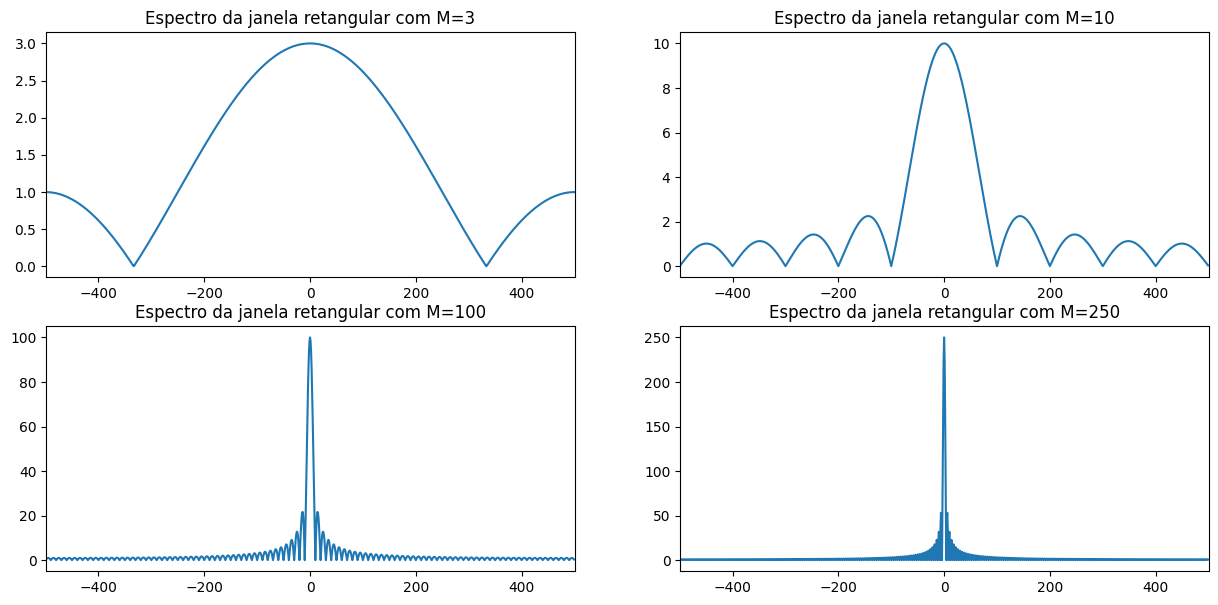

In [18]:
M = np.array([3, 10, 100, 250]);fig, axes = plt.subplots(2, 2, figsize=(15,7))
for j in range(2):
    for i in range(2):
        index = 2 * i + j; w = np.concatenate((np.ones(M[index]), np.zeros(N-M[index])))
        axes[i, j].plot(range(-N // 2, N // 2), np.roll(abs(np.fft.fft(w)), N // 2));        axes[i, j].set_xlim([-N / 2 + 1, N / 2])
        axes[i, j].set_title("Espectro da janela retangular com M={}".format(M[index]))

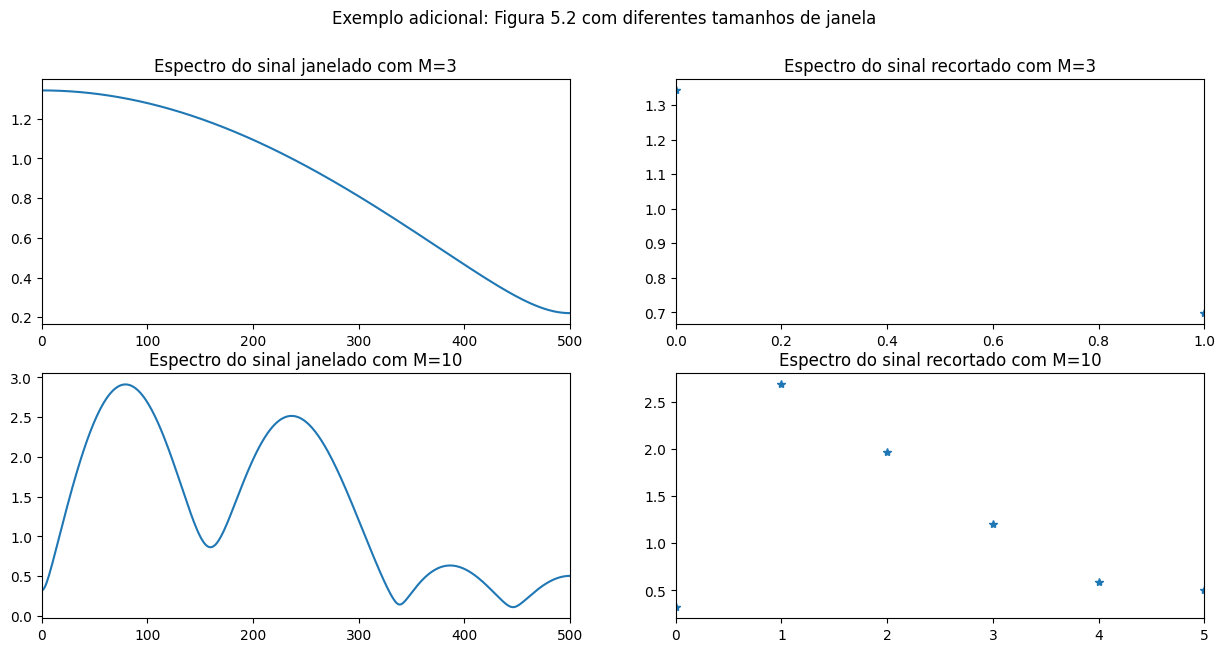

In [19]:
M = np.array([3, 10]);fig, axes = plt.subplots(len(M), 2, figsize=(15,7));fig.suptitle("Exemplo adicional: Figura 5.2 com diferentes tamanhos de janela")
for j in range(len(M)):
    w = np.concatenate( (np.ones(M[j]), np.zeros(N-M[j])) );ftil = w * f;fcut = ftil[0:M[j]]
    axes[j,0].plot(range(N//2+1), abs(np.fft.fft(ftil)[0:N//2+1]));axes[j,0].set_xlim([0, N//2]);axes[j,0].set_title("Espectro do sinal janelado com M={}".format(M[j]))
    axes[j,1].plot(range(M[j]//2+1), abs(np.fft.fft(fcut)[0:M[j]//2+1]),"*");axes[j,1].set_xlim([0, M[j]//2]);axes[j,1].set_title("Espectro do sinal recortado com M={}".format(M[j]))

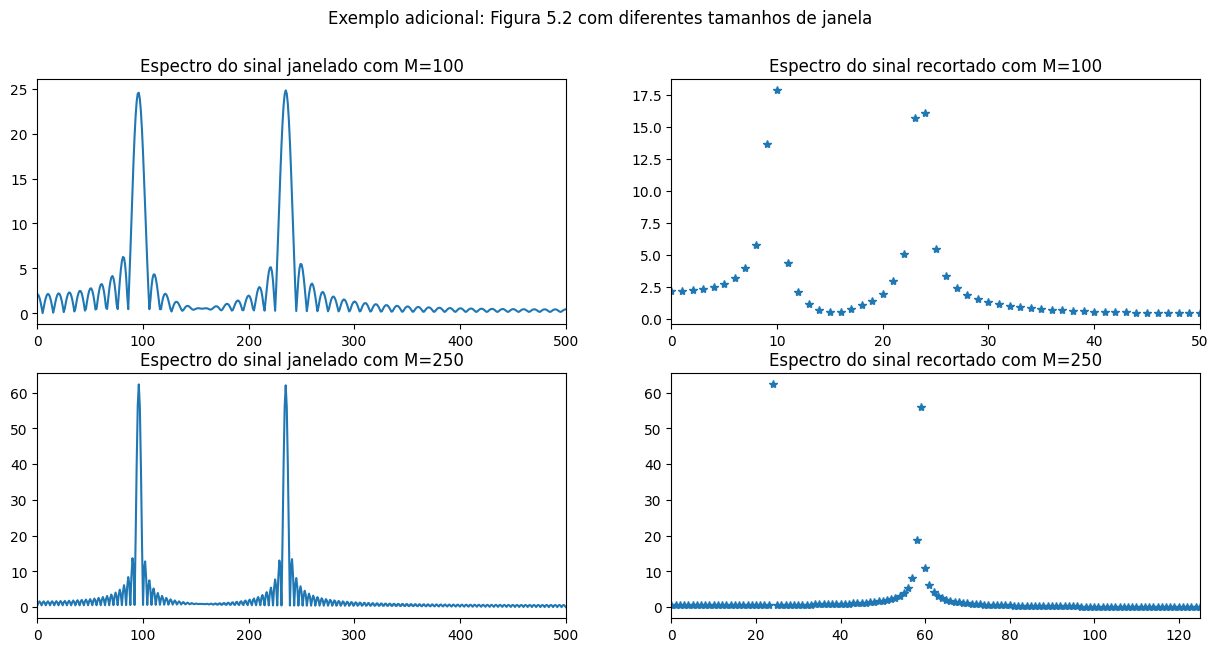

In [20]:
M = np.array([100, 250]);fig, axes = plt.subplots(len(M), 2, figsize=(15,7));fig.suptitle("Exemplo adicional: Figura 5.2 com diferentes tamanhos de janela")
for j in range(len(M)):
    w = np.concatenate( (np.ones(M[j]), np.zeros(N-M[j])) );ftil = w * f;fcut = ftil[0:M[j]]
    axes[j,0].plot(range(N//2+1), abs(np.fft.fft(ftil)[0:N//2+1]));axes[j,0].set_xlim([0, N//2]);axes[j,0].set_title("Espectro do sinal janelado com M={}".format(M[j]))
    axes[j,1].plot(range(M[j]//2+1), abs(np.fft.fft(fcut)[0:M[j]//2+1]),"*");axes[j,1].set_xlim([0, M[j]//2]);axes[j,1].set_title("Espectro do sinal recortado com M={}".format(M[j]))

### Seção 5.2.3: Espectrogramas

Uma forma de analisar um sinal com conteúdo variável no domínio da frequência corresponde a segmentar o sinal, escolhendo um tamanho de janela $M$ que seja pequeno o suficiente para que o conteúdo do sinal seja relativamente estável no intervalo de tempo correspondente a uma janela, e computar uma DFT para cada janela, produzindo uma **Transformada de Fourier de Tempo Reduzido (STFT)** ou **Espectrograma**.

Em relação aos inícios das janelas, podemos ter o $k$-ésimo segmento começando na posição $m=kn$, ou seja,
$$\tilde{x}^k = (x_{kn},x_{kn+1},\ldots,x_{kn+M-1}).$$
Dependendo do parâmetro $n$=distância entre inícios de segmentos sucessivos, podemos ter:

- se $n=M$, teremos $\tilde{x}^0 = (x_{0},x_{1},\ldots,x_{M-1})$, $\tilde{x}^1 = (x_{M},x_{M+1},\ldots,x_{2M-1})$, etc. Nesse caso as janelas são *justapostas*;

- se $n<M$, teremos $\tilde{x}^0 = (x_{0},x_{1},\ldots,x_{M-1})$ e $\tilde{x}^1 = (x_{n},x_{n+1},\ldots,x_{n+M-1})$, onde algumas amostras aparecem nos segmentos sucessivos. Nesse caso as janelas são *sobrepostas*;

Frequentemente a sobreposição é definida através de um *fator de sobreposição*: janelas com sobreposição de $50\%$ por exemplo correspondem a $n=M/2$, e em geral definir $n=\alpha M$ com $\alpha\in(0,1)$ acarretará uma sobreposição de $100(1-\alpha)\%$.

- o caso $n>M$ não é usado com tanta frequência, pois nesse caso as janelas não cobrem todo o sinal, deixando porções temporais fora da análise.

### Exemplo 5.5

Considere outra vez o sinal do exemplo 5.1: $g(t) = \left\{\begin{array}{ll}
\sin(2\pi(96)t),&0\le t<\frac{1}{2}\\
\sin(2\pi(235)t),&\frac{1}{2}\le t\le 1.
\end{array}\right.$

In [21]:
def show_spectra(N, t, g, M, O):
    fig, ax = plt.subplots(2,2, figsize=(15,9))
    for j in range(2):
        for i in range(2):
            index = 2 * i + j
            Snrows = M[index] // 2
            Sncols = m.floor( (N-M[index]) / O[index] ) + 1
            S = np.zeros((Snrows, Sncols))
            for k in range(Sncols):
                inicio = int(k * O[index])
                fim = int(k * O[index] + M[index])
                magspec = np.log(1+abs(np.fft.fft(g[inicio:fim])))
                S[0:Snrows, k] = magspec[0:Snrows]
            S = np.flipud(S)
            S = S / np.amax(S)
            
            ax[i, j].imshow(S, cmap='gray', aspect='auto', interpolation='none', extent=[0, 1, 0, 500])
            ax[i, j].set_title("Espectrograma com M={}, m={}".format(M[index],O[index]))
            ax[i, j].set_ylabel("Frequência [Hertz]")
            ax[i, j].set_xlabel("Tempo [s]")
    plt.show()

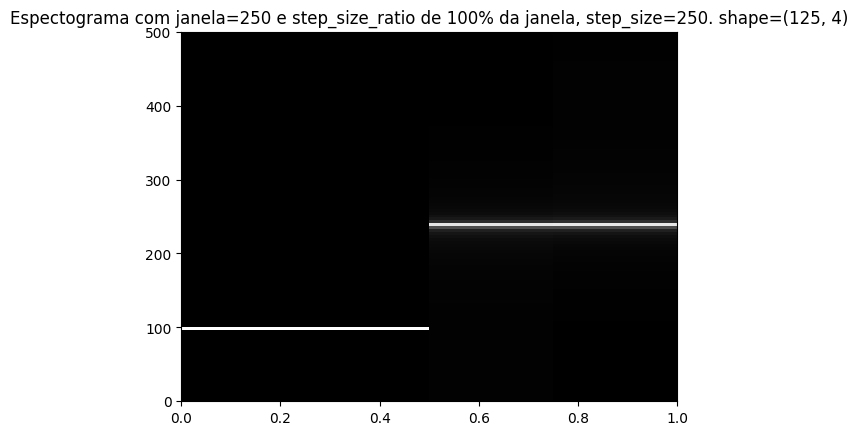

In [22]:
import math
from scipy.fft import fft, ifft

def plot_spectogram(x, window_width=50, step_size_ratio=0.6, log_normalized=False):
    N = len(x)
    nr_rows = window_width // 2
    step_size = step_size_ratio * window_width
    
    nr_cols =  math.floor((N - window_width) / step_size) + 1
    spectogram = np.zeros((nr_rows, nr_cols))
    
    for col in range(nr_cols):
        inicio = int(col * step_size)
        fim = inicio + window_width
        magnitude = abs(fft(x[inicio:fim]))
        if log_normalized:
            magnitude = np.log(1+magnitude)
        spectogram[0:nr_rows, col] = np.flip(magnitude[0:nr_rows])
    
    plt.title(f'Espectograma com janela={window_width} e step_size_ratio de {step_size_ratio*100}% da janela, step_size={step_size}. shape={spectogram.shape}')
    plt.imshow(spectogram, cmap='gray', aspect='auto', interpolation='none', extent=[0, 1, 0, N//2])

    
plot_spectogram(g, window_width=250, step_size_ratio=1)

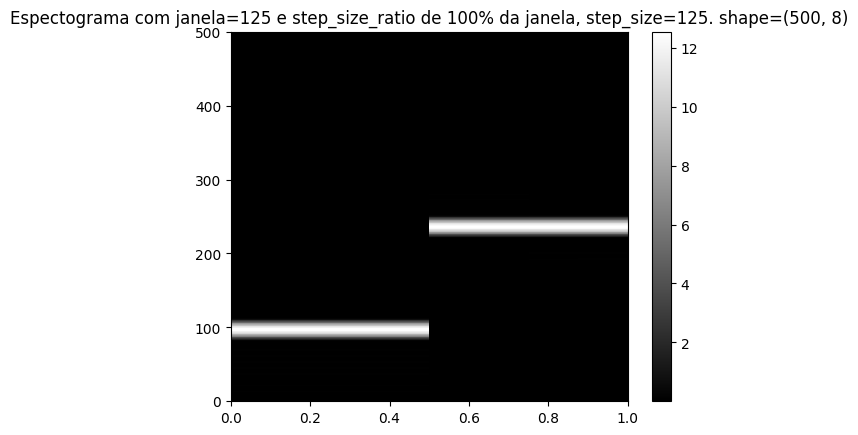

In [43]:
import math
from scipy.fft import fft, ifft

janelas = ['retangular', 'triangular', 'gausiana', 'hamming']

def build_window2(N, start, end, type='retangular'):
    w = np.zeros(N);
    width = end - start
    if type == 'retangular':
        w[start:end] = 1
        
    if type == 'triangular':
        w[start:end] = np.bartlett(width)
    
    if type == 'gausiana':
        sigma = 10
        w[start:end] = signal.gaussian(width, sigma)
        
    if type == 'hamming':
        w[start:end] = np.hamming(width)
        
    return w

# espectograma janelado x*h e não recortado. A ideia é manter a resolução máxima (N//2 Hz)
def plot_spectogram2(x, window_width=50, step_size_ratio=0.6, log_normalized=False, exp_normalized=False, tipo_janela='retangular'):
    N = len(x)
    nr_rows = N // 2
    step_size = step_size_ratio * window_width
    
    nr_cols =  math.floor((N - window_width) / step_size) + 1
    spectogram = np.zeros((nr_rows, nr_cols))
    
    for col in range(nr_cols):
        inicio = int(col * step_size)
        fim = inicio + window_width
        janela = build_window2(N, inicio, fim, type=tipo_janela)
        x_janelado = x * janela
        magnitude = abs(fft(x_janelado))
        if log_normalized:
            magnitude = np.log(1+magnitude)
        elif exp_normalized:
            magnitude = np.log(1+magnitude)**2
        spectogram[0:nr_rows, col] = np.flip(magnitude[0:nr_rows])
    
    plt.title(f'Espectograma com janela={window_width} e step_size_ratio de {step_size_ratio*100}% da janela, step_size={step_size}. shape={spectogram.shape}')
    plt.imshow(spectogram, cmap='gray', aspect='auto', interpolation='none', extent=[0, 1, 0, N//2])
#     plt.imshow(spectogram, aspect='auto', interpolation='none', extent=[0, 1, 0, N//2])
    plt.colorbar()
plot_spectogram2(g, window_width=125, step_size_ratio=1, exp_normalized=True ,tipo_janela='hamming')

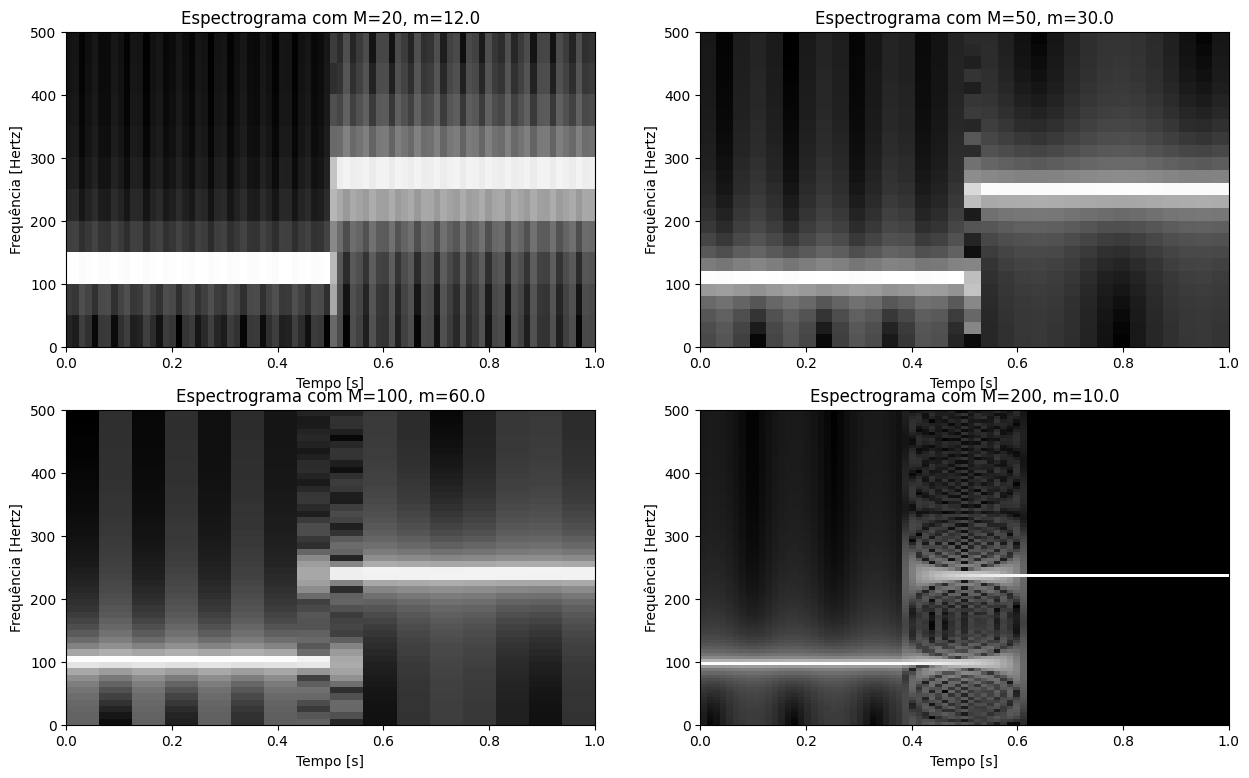

In [24]:
N = 1000;
t = np.arange(0, 1, 1/N);
f = 0.5*np.sin(2*m.pi*96*t)+0.5*np.sin(2*m.pi*235*t)
g = np.concatenate( (np.sin(2*m.pi*96*t[0:N//2]), np.sin(2*m.pi*235*t[N//2:N])) , axis=0) 
M = np.array([20, 50, 100, 200]);O = 0.6 * M # saltos de 60% do valor da janela
O[3] = 10;
show_spectra(N, t, g, M, O)

### Exemplo 5.6

Nesse exemplo consideramos um sinal com 3 componentes senoidais, sendo uma com frequência instantânea variável:

$$f(t) = 1.0\sin(2\pi(111)t)+0.5\sin(2\pi(123)t)+0.5\sin(2\pi\omega(t)t),$$

onde $\omega(t)=150+50\cos(2\pi t)$, para $t\in[0,1)$ com taxa de amostragem $R=1000$ Hz.

Vamos visualizar o espectro do sinal inteiro, e algumas versões de espectrogramas com diferentes escolhas de $M$ e $m$.

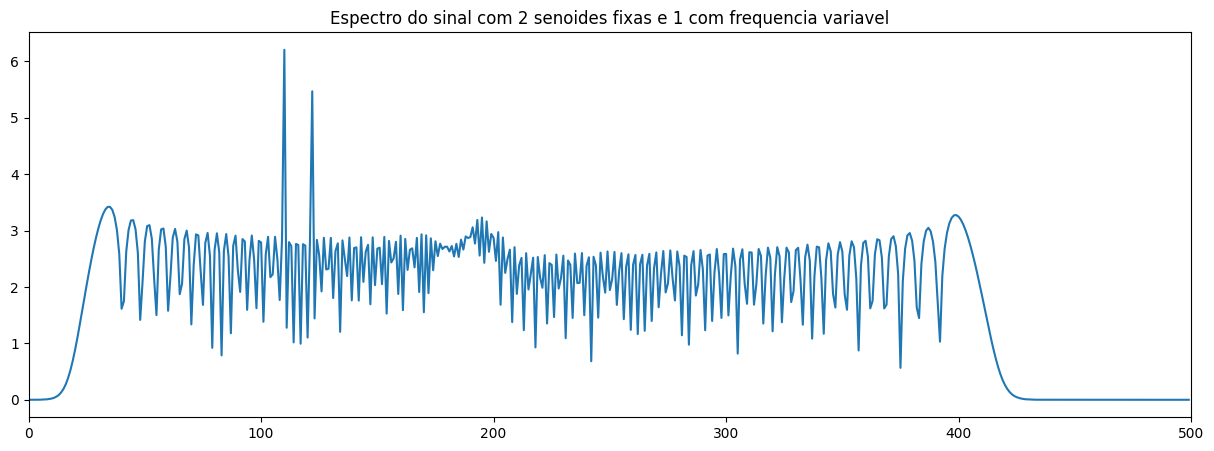

In [25]:
N = 1000;
# t = np.linspace(0, 1-1/N, N);
t = np.linspace(0,1, N, endpoint=False)
omega = 150 + 50 * np.cos(2*m.pi * t)
f = np.sin(2*m.pi* 111 * t)+0.5*np.sin(2*m.pi* 123 * t)+0.5*np.sin(2*m.pi* omega * t)

plt.figure(figsize=(15,5));
plt.plot(range(N//2),np.log(1+abs(np.fft.fft(f)[1:N//2+1])))
plt.xlim([0, N/2]);plt.title("Espectro do sinal com 2 senoides fixas e 1 com frequencia variavel");

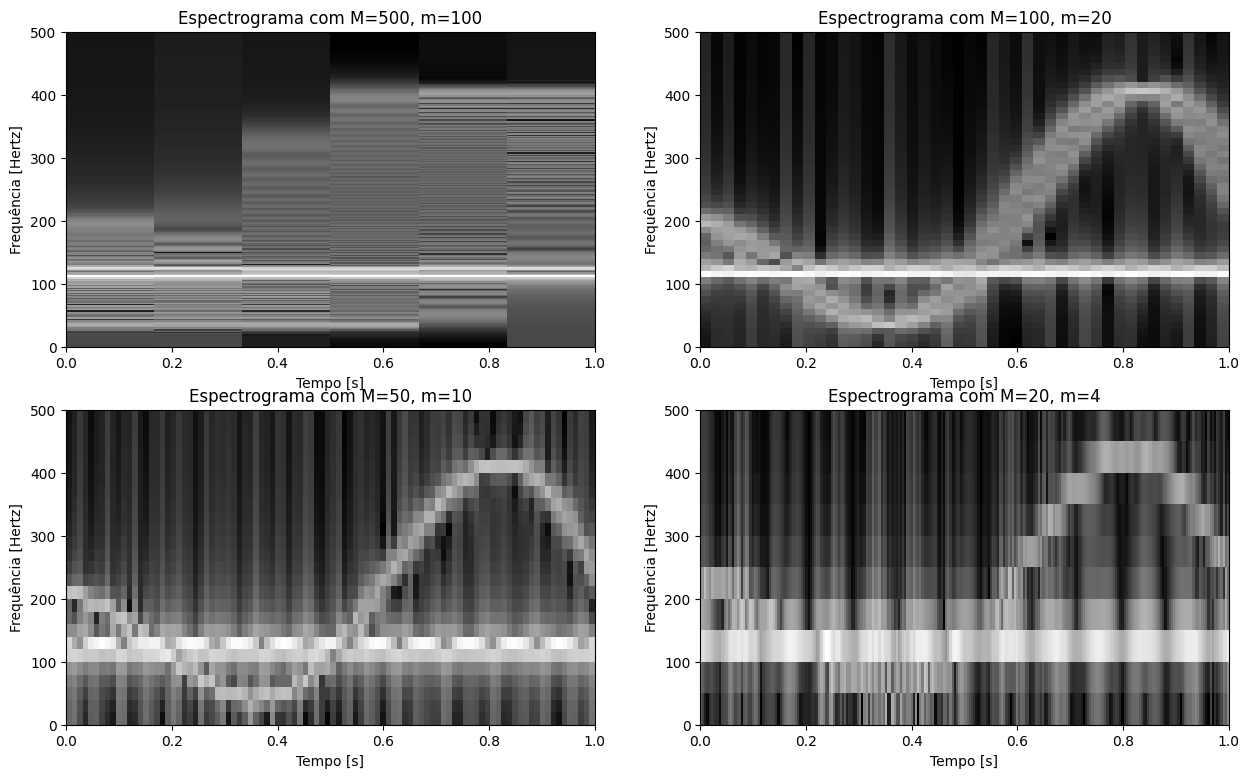

In [26]:
M = np.array([500, 100, 50, 20]);
O = np.array([100, 20, 10, 4]);
show_spectra(N, t, f, M, O)

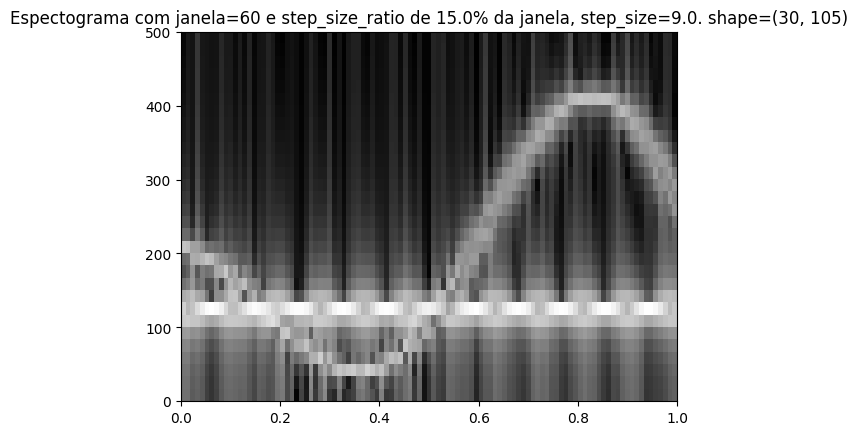

In [29]:
# Espectograma com recorte
plot_spectogram(f, window_width=60, step_size_ratio=0.15, log_normalized=True)

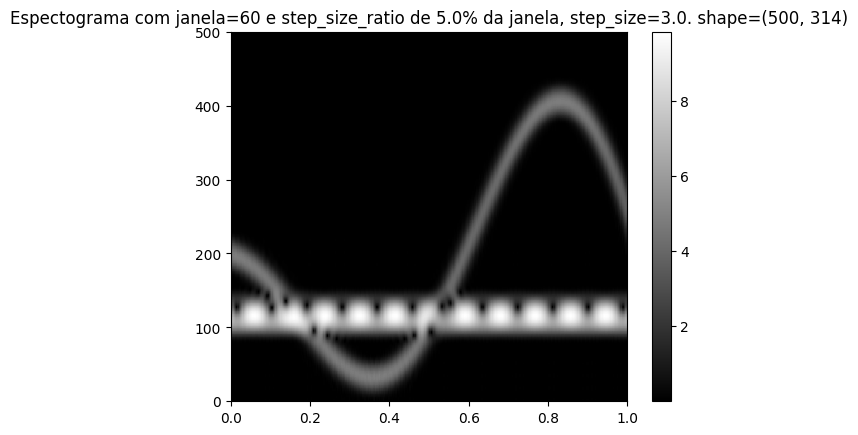

In [47]:
# Espectograma janelado
plot_spectogram2(f, window_width=60, step_size_ratio=0.05, exp_normalized=True, tipo_janela='hamming')

### Exemplo 5.6: frequência instantânea

Os espectrogramas acima deixam claro que a frequência instantânea da 3a componente

$$f_3(t) = 0.5\sin(2\pi\omega(t)t)$$

não é a própria função $\omega(t)=150+50\cos(2\pi t)$, que varia apenas entre $100$ e $200$, mas sim a variação instantânea da fase (argumento do seno), cuja expressão é

$$\tilde{\omega}(t)=\frac{\partial 2\pi\omega(t)t}{\partial t} = 2\pi\left(\omega(t)+\omega'(t)t\right) =
2\pi\big(150+50\cos(2\pi t)-100\pi\sin(2\pi t)t\big),$$

em radianos/segundo, ou equivalentemente em Hz

$$\tilde{f}(t)= 150+50\cos(2\pi t)-100\pi\sin(2\pi t)t,$$

cuja faixa de variação *aumenta* com $t$, como pode ser evidenciado pelo gráfico abaixo (compare-o com os últimos espectrogramas).

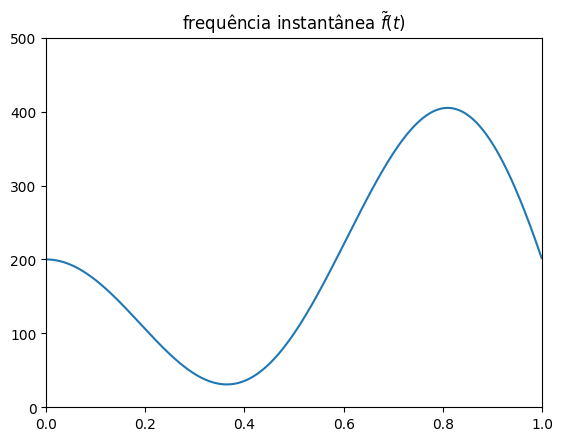

In [149]:
omegatil = omega - 100*m.pi*np.sin(2*m.pi * t)*t
plt.plot(t,omegatil);
plt.axis([0, 1, 0, 500]);
plt.title(r"frequência instantânea $\tilde{f}(t)$");
plt.show()

### Seção 5.2.4: Outros tipos de janela

Até esse momento só vimos exemplos usando a janela retangular ($w_n=1$ se $m\le n<m+M$, $w_n=0$ caso contrário). Porém o resultado do teorema 5.2.1 vale para outras formas de janela, que podem ter impactos diferentes sobre o espectro dos recortes do sinal.

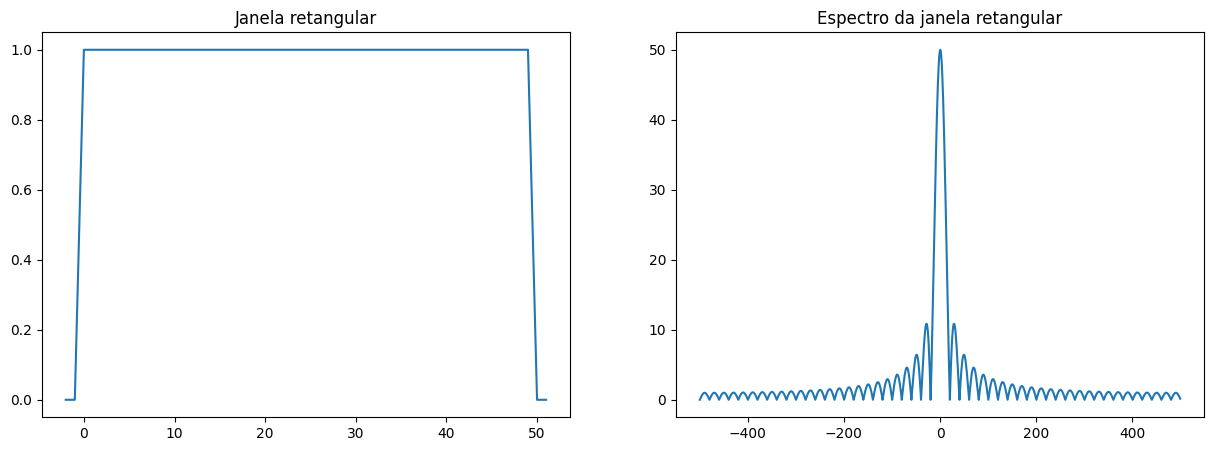

In [182]:
N = 1000;
wr = np.zeros(N);
wr[99:149] = np.ones(50)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].set_title('Janela retangular');
axes[0].plot(range(-2, 52), wr[97:151])
freqs = np.linspace(-N/2,N/2,N);
Fmag = abs(np.fft.fft(wr))
axes[1].set_title('Espectro da janela retangular');
axes[1].plot(freqs, np.fft.fftshift(Fmag));

In [183]:
def plot_window_func(f, N, windowname):
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    axes[0].set_title("Janela {}".format(windowname))
    axes[0].plot(f)
    axes[1].set_title("Espectro da janela {}".format(windowname))
    freqs = np.linspace(-N/2,N/2, f.size)
    Fmag = abs(np.fft.fft(f))
    axes[1].plot(freqs, np.fft.fftshift(Fmag))

### Janela triangular ('Bartlett')

Definida por

$$w_j = \left\{\begin{array}{ll}
\frac{2j}{M},&m\le j\le m+M/2,\\
\frac{M+m-1-j}{M/2+m-1},&m+M/2<j<m+M,\\
0,&\mbox{c.c.}
\end{array}\right.
$$

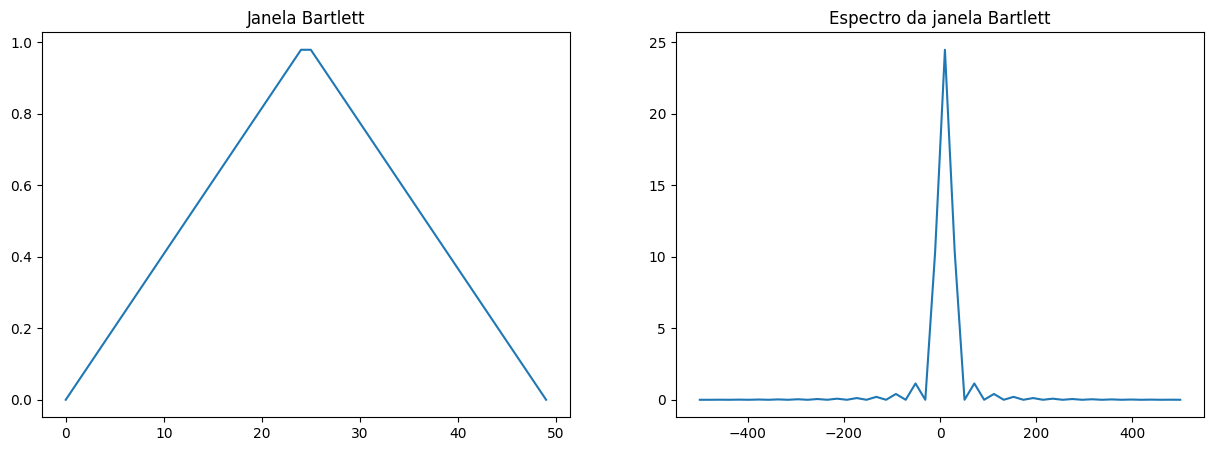

In [184]:
win = np.bartlett(50)
plot_window_func(win, N, 'Bartlett')

### Janela Gaussiana

Definida por

$$w_j = Ce^{-\alpha\left(\frac{j-(m+(M-1)/2)}{M/2}\right)^2}$$

onde $C$ e $\alpha$ são parâmetros definidos pelo usuário.

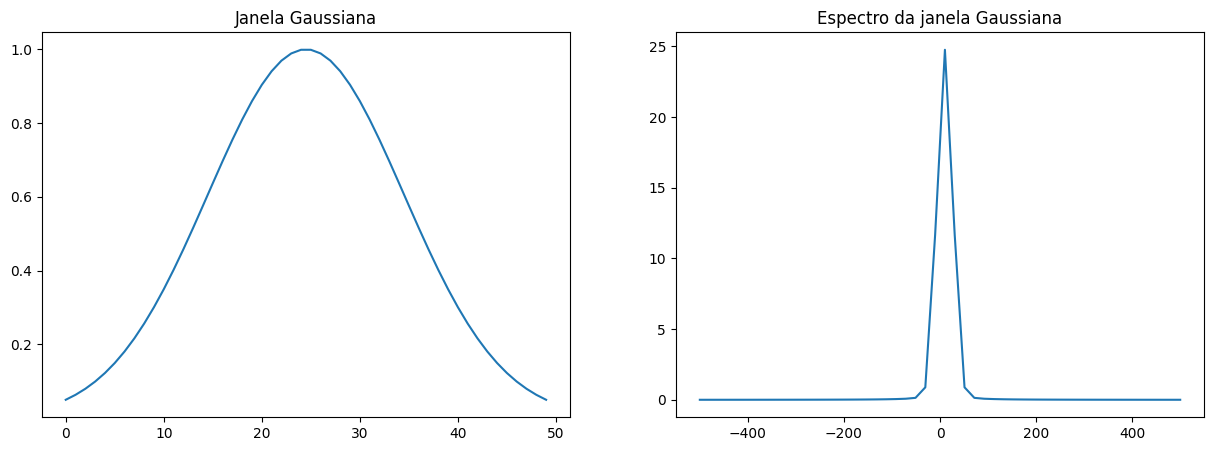

In [185]:
sigma = 10
win = signal.gaussian(50, sigma)
plot_window_func(win, N, 'Gaussiana')

### Janela de Hamming

Definida por
$$w_j = \left\{\begin{array}{ll}
0.54-0.46\cos\left(2\pi\frac{j-m}{M}\right),&m\le j\le m+M,\\
0,&\mbox{c.c.}
\end{array}\right.$$

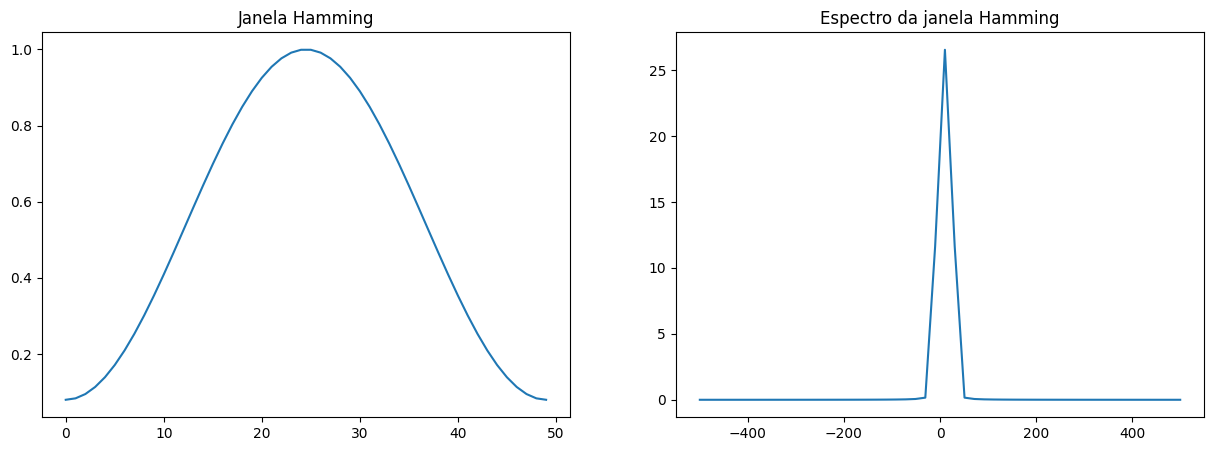

In [186]:
win = np.hamming(50)
plot_window_func(win, N, 'Hamming')

In [187]:
wsize = 50
ns = range(wsize)

win_bartlett = np.bartlett(wsize)
win_hamming = np.hamming(wsize)
sigma = 10
win_gaussian = signal.gaussian(wsize, sigma)

freqs = np.linspace(-N/2,N/2, wsize)
spec_bartlett = abs(np.fft.fft(win_bartlett))
spec_hamming = abs(np.fft.fft(win_hamming))
spec_gaussian = abs(np.fft.fft(win_gaussian))

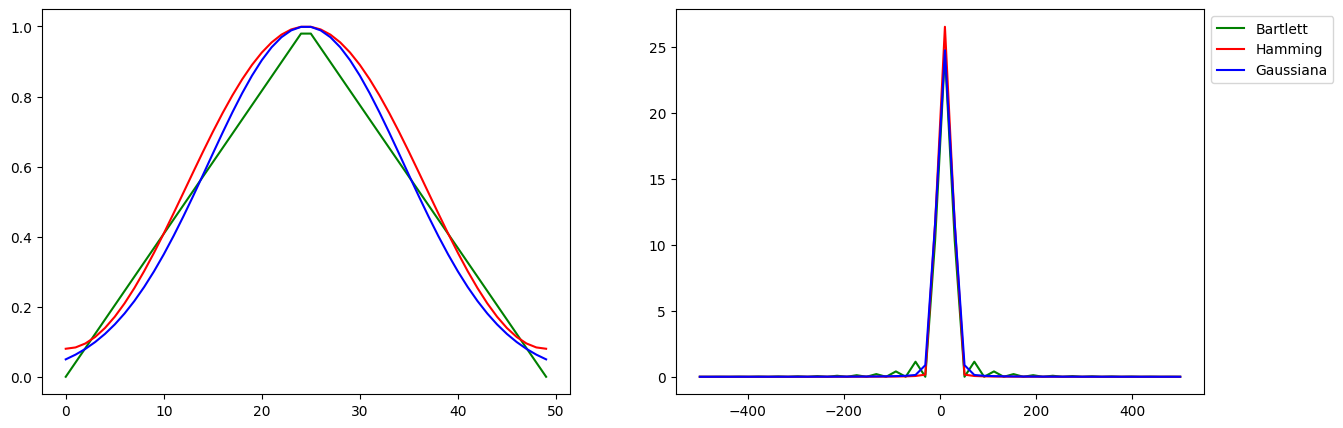

In [188]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ns, win_bartlett, 'g-', label='Bartlett')
axes[0].plot(ns, win_hamming, 'r-', label='Hamming')
axes[0].plot(ns, win_gaussian, 'b-', label='Gaussiana')
axes[1].plot(freqs, np.fft.fftshift(spec_bartlett), 'g-', label='Bartlett')
axes[1].plot(freqs, np.fft.fftshift(spec_hamming), 'r-', label='Hamming')
axes[1].plot(freqs, np.fft.fftshift(spec_gaussian), 'b-', label='Gaussiana')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));plt.show()